In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('E:/Project/ML Project/Credit Risk/german_credit_data.csv')

In [3]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
data.shape

(1000, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:

data['Age'].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [8]:




data['Risk'].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [9]:
data['Job'].unique()

array([2, 1, 3, 0])

In [10]:
data.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [11]:
data.duplicated().sum()

np.int64(0)

In [12]:
data['Saving accounts'] = data['Saving accounts'].fillna(data['Saving accounts'].mode()[0])
data['Checking account'] = data['Checking account'].fillna(data['Checking account'].mode()[0])

In [13]:
data.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [14]:
data.drop(columns = 'Unnamed: 0', inplace = True)

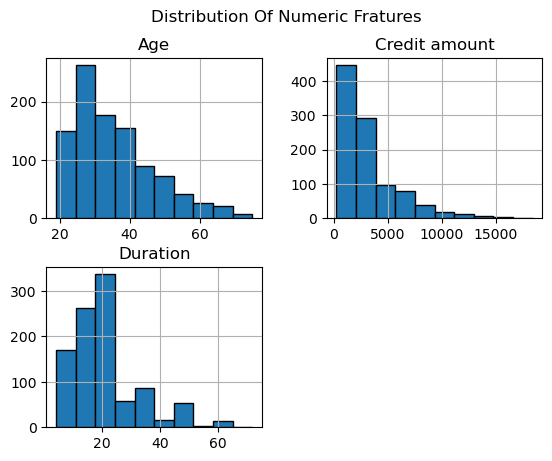

In [15]:
data[['Age', 'Credit amount', 'Duration']].hist(bins = 10, edgecolor = 'black')
plt.suptitle("Distribution Of Numeric Fratures" )
plt.show()

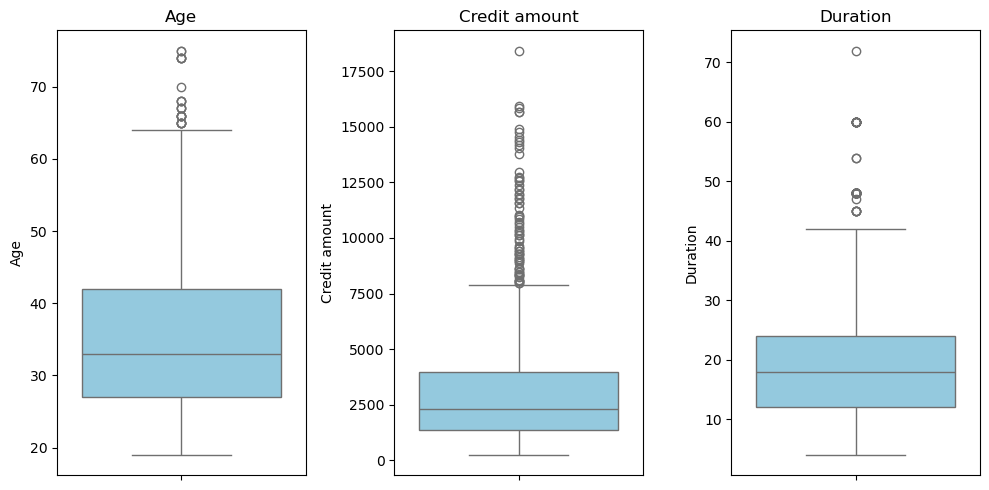

In [16]:
plt.figure(figsize=(10,5))
for i, col in enumerate (['Age', 'Credit amount', 'Duration']):
    plt.subplot(1 ,3 ,i+1)
    sns.boxplot(y = data[col], color = 'skyblue')
    plt.title(col)
    
plt.tight_layout()
plt.show()

In [17]:
data.query('Duration > 70')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
677,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad


In [18]:
data.query('Duration >= 60')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
29,63,male,2,own,little,little,6836,60,business,bad
134,21,female,2,own,moderate,little,10144,60,radio/TV,good
255,27,male,1,own,little,moderate,7418,60,radio/TV,good
332,24,female,3,own,moderate,moderate,7408,60,car,bad
373,63,male,3,free,little,little,13756,60,car,good
374,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
616,27,male,3,free,little,moderate,9157,60,radio/TV,good
637,21,male,2,own,little,little,15653,60,radio/TV,good
672,42,male,3,own,little,little,10366,60,car,good
677,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad


In [19]:
categorical_columns = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

In [20]:
categorical_columns

['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

C:\Users\HP\AppData\Local\Temp\ipykernel_560\25802725.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x = cols, palette = 'rocket', order = data[cols].value_counts().index)
C:\Users\HP\AppData\Local\Temp\ipykernel_560\25802725.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x = cols, palette = 'rocket', order = data[cols].value_counts().index)
C:\Users\HP\AppData\Local\Temp\ipykernel_560\25802725.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x = cols, palette = 'rocket', order = data

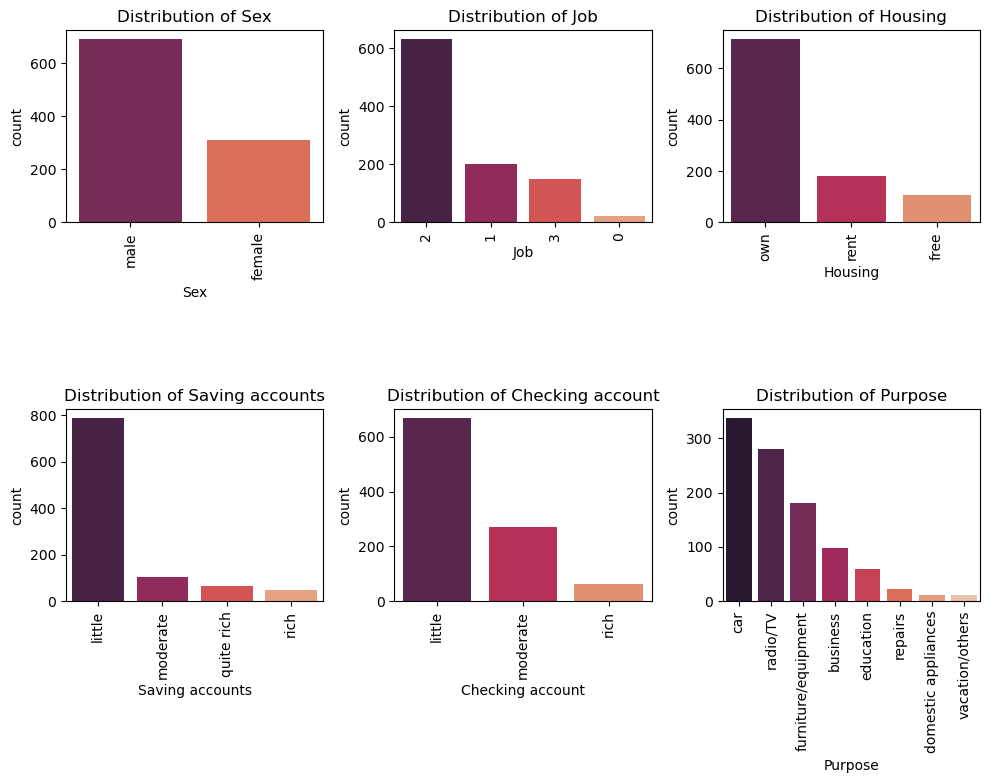

In [21]:
plt.figure(figsize=(10,10))
for i, cols in enumerate(categorical_columns):
    plt.subplot(3, 3, i+1)
    sns.countplot(data = data, x = cols, palette = 'rocket', order = data[cols].value_counts().index)
    plt.title(f'Distribution of {cols}')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [22]:
corr = data[['Age', 'Job', 'Credit amount', 'Duration']].corr()
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


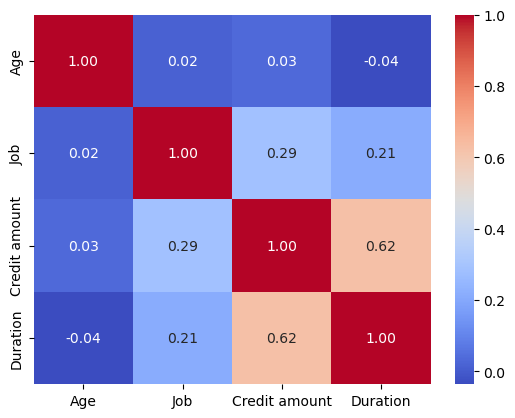

In [23]:
sns.heatmap(corr, annot = True, cmap='coolwarm', fmt='.2f')
plt.show()

In [24]:
data.groupby('Job')['Credit amount'].mean()

Job
0    2745.136364
1    2358.520000
2    3070.965079
3    5435.493243
Name: Credit amount, dtype: float64

In [25]:
data.groupby('Sex')['Credit amount'].mean()

Sex
female    2877.774194
male      3448.040580
Name: Credit amount, dtype: float64

In [26]:
pd.pivot_table(data, values = 'Credit amount', index='Housing', columns='Purpose')

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4931.800000,5834.181818,NaN,4387.266667,4100.181818,2417.333333,2750.666667,7227.250
own,3800.592105,3329.949772,1546.5,2198.647059,3107.459016,2540.493392,2866.000000,8700.375
rent,5614.125000,3487.968254,1255.5,2931.000000,2727.354167,2199.763158,1522.000000,NaN


##### Most of the credit amounmt is depend on vecation

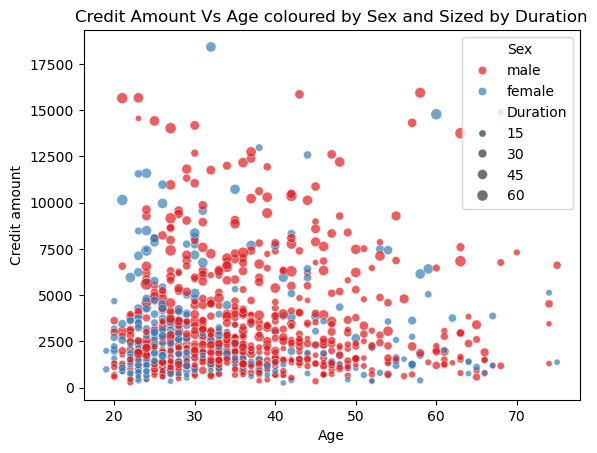

In [27]:
#Relationship between age duration and credit amount

sns.scatterplot(data, x = 'Age', y= 'Credit amount', hue='Sex', size = 'Duration', alpha = 0.7, palette = 'Set1')
plt.title('Credit Amount Vs Age coloured by Sex and Sized by Duration')
plt.show()

##### IF the Credit amount is increases the more duration also increases
##### Most of the Young age pepole are getteing low Credit amount

C:\Users\HP\AppData\Local\Temp\ipykernel_560\3563757963.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data= data, x='Saving accounts', y='Credit amount', palette = 'rocket')


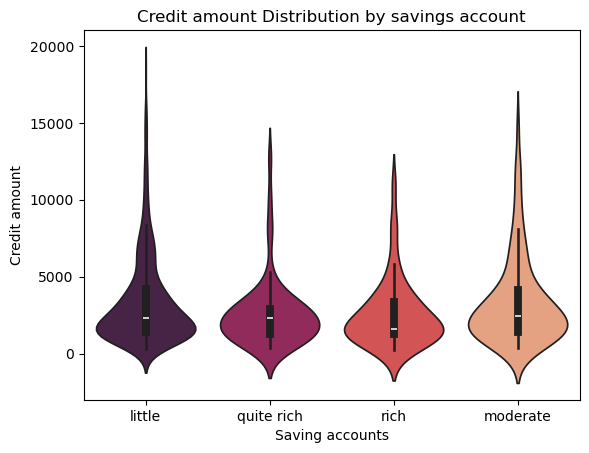

In [28]:
sns.violinplot(data= data, x='Saving accounts', y='Credit amount', palette = 'rocket')
plt.title('Credit amount Distribution by savings account')
plt.show()

##### Credit amount not related to saving account but littel distribution in modurate and little

In [29]:
data['Risk'].value_counts(normalize = True) * 100

Risk
good    70.0
bad     30.0
Name: proportion, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_560\2793926567.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= data, x='Risk', y=col, palette='Set2')
C:\Users\HP\AppData\Local\Temp\ipykernel_560\2793926567.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= data, x='Risk', y=col, palette='Set2')
C:\Users\HP\AppData\Local\Temp\ipykernel_560\2793926567.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data= data, x='Risk', y=col, palette='Set2')


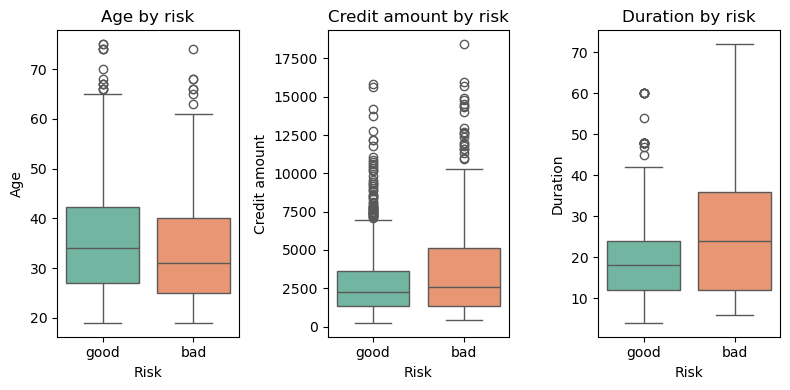

In [30]:
plt.figure(figsize=(8,4))
for i, col in enumerate(['Age', 'Credit amount', 'Duration']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data= data, x='Risk', y=col, palette='Set2')
    plt.title(f'{col} by risk')
    
plt.tight_layout()
plt.show()

##### Age dosn't seem really related in Credit risk
##### In Credit amount increase the bad has a higher side 
##### In Duration also we see a similar sutuation like Credit amount

In [31]:
data.groupby('Risk')[['Age', 'Credit amount', 'Duration']].mean()

,Age,Credit amount,Duration
Risk,,,
bad,33.963333,3938.126667,24.860000
good,36.224286,2985.457143,19.207143


##### Lower duration is better than higher duration
##### Lower credit amount also better than higher credit amount
##### Age distributes the simmilar risks

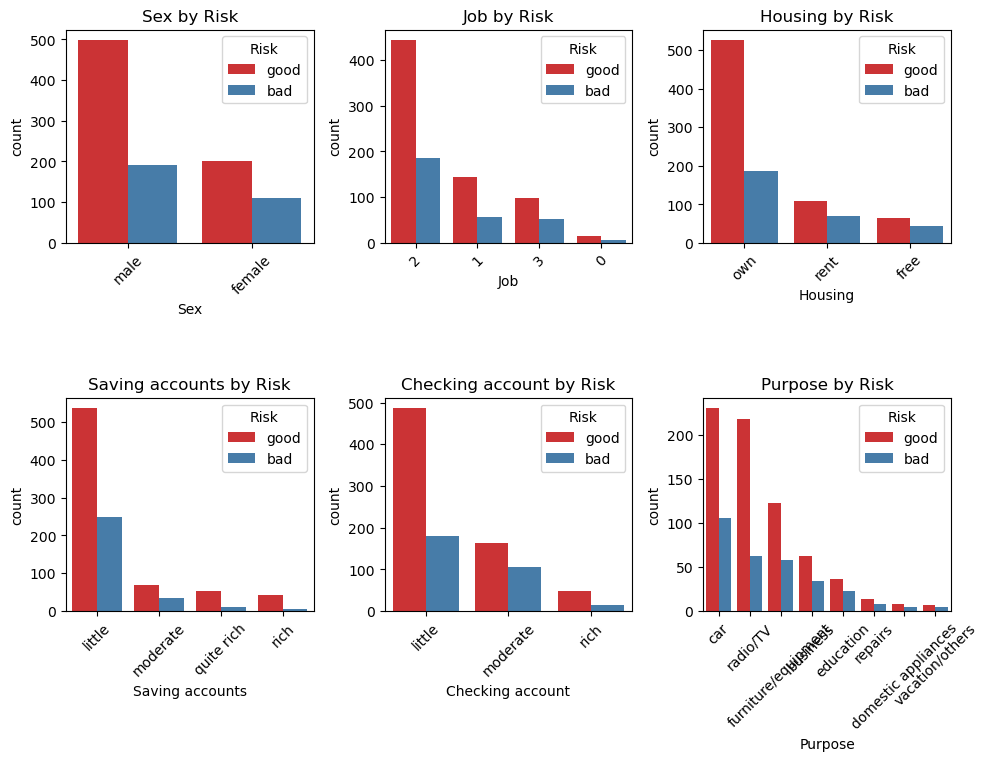

In [32]:
plt.figure(figsize=(10,10))
for i, col in enumerate(categorical_columns):
    plt.subplot(3, 3, i+1)
    sns.countplot(data = data, x=col, hue='Risk', palette = 'Set1', order = data[col].value_counts().index)
    plt.title(f'{col} by Risk')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Feature enginering

In [33]:
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [34]:
features = ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account','Credit amount', 'Duration']
target = 'Risk'

In [35]:
data_model = data[features + [target]].copy()

In [36]:
data_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,67,male,2,own,little,little,1169,6,good
1,22,female,2,own,little,moderate,5951,48,bad
2,49,male,1,own,little,little,2096,12,good
3,45,male,2,free,little,little,7882,42,good
4,53,male,2,free,little,little,4870,24,bad


In [37]:
# Encoding the categorical column

from sklearn.preprocessing import LabelEncoder
import joblib

In [38]:
cat_columns = data_model.select_dtypes(include = 'object').columns.drop('Risk')

In [39]:
le_dict = {}

In [40]:
cat_columns

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account'], dtype='object')

In [41]:
for col in cat_columns:
    le = LabelEncoder()
    data_model[col] = le.fit_transform(data_model[col])
    le_dict[col] = le
    joblib.dump(le, f"{col}_encoder.pkl")

In [42]:
le_target = LabelEncoder()

In [43]:
target

'Risk'

In [44]:
data_model[target] = le_target.fit_transform(data_model[target])

In [45]:
data_model[target]

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Risk, Length: 1000, dtype: int64

##### Good -> 1
##### Bad -> 0

In [46]:
data_model[target].value_counts()

Risk
1    700
0    300
Name: count, dtype: int64

In [47]:
joblib.dump(le_target, 'target_encoder.pkl')

['target_encoder.pkl']

In [48]:
data_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,67,1,2,1,0,0,1169,6,1
1,22,0,2,1,0,1,5951,48,0
2,49,1,1,1,0,0,2096,12,1
3,45,1,2,0,0,0,7882,42,1
4,53,1,2,0,0,0,4870,24,0


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X = data_model.drop(target, axis=1)
Y = data_model[target]

In [51]:
X

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,67,1,2,1,0,0,1169,6
1,22,0,2,1,0,1,5951,48
2,49,1,1,1,0,0,2096,12
3,45,1,2,0,0,0,7882,42
4,53,1,2,0,0,0,4870,24
...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,0,1736,12
996,40,1,3,1,0,0,3857,30
997,38,1,2,1,0,0,804,12
998,23,1,2,0,0,0,1845,45


In [52]:
Y

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Risk, Length: 1000, dtype: int64

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state=1)

In [54]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(800, 8) (200, 8) (800,) (200,)


In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [56]:
def train_model(model, param_grid, X_train, Y_train, X_test, Y_test):
    grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, Y_train)
    best_model = grid.best_estimator_
    Y_pred = best_model.predict(X_test)
    acc = accuracy_score(Y_test, Y_pred)
    return best_model, acc, grid.best_params_

In [57]:
dt = DecisionTreeClassifier(random_state = 1, class_weight = 'balanced')
dt_param_grid = {
    'max_depth' : [3,5,7,10,None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf' : [1,2,4]
}

In [58]:
best_dt, acc_dt, params_dt = train_model(dt, dt_param_grid, X_train, Y_train, X_test, Y_test)

In [59]:
print("Decision Tree Accuracy", acc_dt)
print("Best Parameter", params_dt)

Decision Tree Accuracy 0.625
Best Parameter {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [60]:
rf = RandomForestClassifier(random_state = 1, class_weight = 'balanced', n_jobs = -1)

In [61]:
rf_param_grid = {
    "n_estimators": [100,200],
    "max_depth": [5, 7, 10, None],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1, 2, 4]
}

In [62]:
best_rf, acc_rf, params_rf = train_model(rf, rf_param_grid, X_train, Y_train, X_test, Y_test)

In [63]:
print("Random Forest Accuracy", acc_rf)
print("Best Parameter", params_rf)

Random Forest Accuracy 0.715
Best Parameter {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [64]:
et = ExtraTreesClassifier(random_state = 1, class_weight = 'balanced', n_jobs = -1)

In [65]:
et_param_grid = {
    "n_estimators": [100,200],
    "max_depth": [5, 7, 10, None],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1, 2, 4]
}

In [66]:
best_et, acc_et, params_et = train_model(et, et_param_grid, X_train, Y_train, X_test, Y_test)

In [68]:
print("Extra Trees accuracy", acc_et)
print("Best Parameter", params_et)

Extra Trees accuracy 0.68
Best Parameter {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [69]:
xgb = XGBClassifier(random_state = 1, scale_pos_weight = (Y_train==0).sum() / (Y_train==0).sum(), use_label_encoder = False, eval_matric = "logloss")

In [70]:
xgb_param_grid = {
    "n_estimators" : [100, 200],
    "max_depth" : [3, 5, 7],
    "learning_rate" : [0.01, 0.1, 0.2],
    "subsample" : [0.7,1],
    "colsample_bytree" : [0.7, 1]
}

In [71]:
best_xgb, acc_xgb, params_xgb = train_model(xgb, xgb_param_grid, X_train, Y_train, X_test, Y_test)

C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [20:01:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "eval_matric", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [72]:
print("XGB accuracy", acc_xgb)
print("Best parameter", params_xgb)

XGB accuracy 0.73
Best parameter {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}


In [73]:
best_et.predict(X_test)

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1])

In [74]:
joblib.dump(best_rf, "random_forest_credit_model.plk")

['random_forest_credit_model.plk']